# 🧠 Classificazione di cifre scritte a mano con reti Dense

In questo notebook impareremo a:
- Caricare il dataset MNIST di cifre scritte a mano.
- Preparare e normalizzare i dati per il training.
- Creare una rete neurale completamente connessa (Dense) per riconoscere le cifre da 0 a 9.
- Addestrare e valutare il modello con **TensorFlow e Keras**.
- Visualizzare i risultati e le predizioni.

Useremo un approccio semplice ma efficace per introdurre i concetti fondamentali del machine learning applicato alle immagini.

In [1]:
# Import delle librerie principali
import os                      # gestione file e cartelle
import pandas as pd            # analisi e gestione dati tabellari
import numpy as np             # calcolo numerico e matrici
import matplotlib.pyplot as plt# grafici e visualizzazione immagini
import tensorflow as tf        # deep learning e reti neurali

2025-10-07 07:26:55.801918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759822016.115798      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759822016.203631      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print(os.listdir('/kaggle/input'))  
# Controllo cosa c’è nella cartella /kaggle/input
# Attenzione: qui compaiono solo i dataset aggiunti agli *Input* di questo notebook
# Non basta caricarli nella sezione "Datasets" del profilo,
# bisogna collegarli al notebook tramite il pulsante "Add data"

['mnistnpz']


In [3]:
data = '/kaggle/input/mnistnpz/mnist.npz'  
# Definisco il percorso del file mnist.npz che ho caricato su Kaggle

In [4]:
with np.load(data) as f:
    x_train, y_train = f["x_train"], f["y_train"]
    x_test, y_test = f["x_test"], f["y_test"]

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

# Carico i dati dal file .npz
# Attenzione: diverso da TensorFlow su Colab!
# - Su Colab basta fare: (x_train, y_train), (x_test, y_test) = mnist.load_data()
# - Qui invece uso np.load, che NON restituisce una tupla,
#   ma un "contenitore" da cui devo estrarre manualmente gli array
# Vedremo:
# Train: (60000 immagini, 28x28 pixel) (60000 etichette)
# Test: (10000 immagini, 28x28 pixel) (10000 etichette)

Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


In [5]:
# Verifichiamo i dati
print("Etichetta: ",y_train[4])
print("")
print("Contenuto:")
print(x_train[4])
# Potremmo notare 28 colonne x 28 righe (pixel) che vanno a formare un numero, il 9

Etichetta:  9

Contenuto:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 

In [6]:
# Abbiamo visto una griglia 28 x 28 pixel
# Ora normalizziamo i dati portando i numeri 0 - 255 ad un valore compreso tra 0 e 1
# Nota bene solo x in quanto y è l'etichetta
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [7]:
# Verifichiamo i valori normalizzati
print("Etichetta: ",y_test[4])
print("")
print("Contenuto:")
print(x_test[4])
# Qui possiamo notare come ogni numero che abbiamo visto prima è stato diviso per 255

Etichetta:  4

Contenuto:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

In [8]:
# Costruiamo il nostro modello
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28,28)),     # Appiattiamo l'input da una griglia 28x28 in una squenza lineare da 784 numeri
    Dense(32, activation = "relu"),
    Dense(16, activation = "relu"),
    Dense(10, activation = "softmax") # Le probabilità su 10 valori possibili
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-07 07:27:15.217091: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
# Visualiziamo i parametri del modello
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Importiamo l'ottimizzatore Adam e configuriamo il metodo
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate=0.03),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [11]:
# Alleniamo il modello per 10 epoche e salviamo in "history" l'andamento di loss e accuracy
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 8,
    batch_size = 30
)

Epoch 1/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8211 - loss: 0.5923 - val_accuracy: 0.9054 - val_loss: 0.3371
Epoch 2/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8992 - loss: 0.3769 - val_accuracy: 0.9103 - val_loss: 0.3465
Epoch 3/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9060 - loss: 0.3698 - val_accuracy: 0.8887 - val_loss: 0.4049
Epoch 4/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9098 - loss: 0.3536 - val_accuracy: 0.9135 - val_loss: 0.3661
Epoch 5/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9126 - loss: 0.3423 - val_accuracy: 0.8724 - val_loss: 0.4143
Epoch 6/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9084 - loss: 0.3568 - val_accuracy: 0.9052 - val_loss: 0.3950
Epoch 7/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9051 - loss: 0.3624 - val_accuracy: 0.9132 - val_loss: 0.3468
Epoch 8/8
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9148 - loss: 0.3335 - val_accu

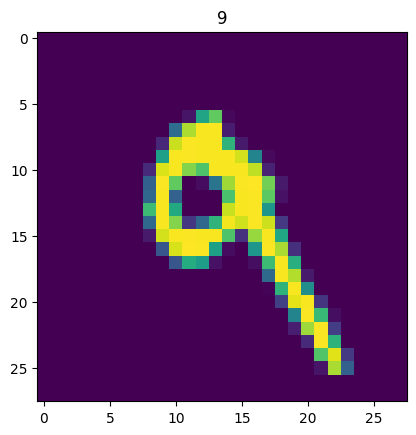

In [12]:
# Testiamo il modello andiamo prima a vedere cosa c'è in una posizione esempio 7
plt.imshow(x_test[7])
plt.title(y_test[7])
plt.show()

In [13]:
# Ora verifichiamo che il modello riconosce il numero

# Aggiungiamo la dimensione batch
pred = model.predict(x_test[7].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [14]:
# Stampiamo un vettore di probabilità
print(pred)

[[4.9978249e-10 3.0932363e-06 8.1777052e-06 3.7446157e-06 1.5091061e-03
  1.9538516e-06 7.3793579e-19 2.8232022e-03 4.2940070e-07 9.9565023e-01]]


In [15]:
# Ora prendiamo la probabilità più alta
classe_predetta = np.argmax(pred)

In [16]:
# Stampiamola
print(classe_predetta)

9


## ✅ Conclusioni

Abbiamo costruito un modello di classificazione di cifre basato su una rete neurale densa, capace di riconoscere le immagini del dataset MNIST con buona accuratezza.

Cosa abbiamo imparato:
- Come gestire e normalizzare immagini in input per una rete neurale.
- Come progettare e addestrare un modello denso con Keras.
- Come valutare le prestazioni usando accuratezza e funzione di perdita.

Con architetture più complesse (come CNN o modelli pre-addestrati) è possibile migliorare ulteriormente i risultati.